# Preference

Make a table (or graph) of method preferences using coherence scores.

Use compliance adjusted scores or drop non-compliant cases...

Validate the table with measure of agreement with the finetuning results (see the interannotator agreement notebook for the preference agreement calculations and simulations).

In [44]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar 
import seaborn as sns
# import scipy.stats as stats
# import simpledorff
# import math
import numpy as np
import random


In [45]:
# stattotex setup
from stattotex import *
import os
# Set stattotex file for this program
stattotex_file = '../Output/cw_preference_stattotex.tex'
# Delete pre-existing stattotex file
try:
    os.remove(stattotex_file)
except:
    print('stattotex file to delete not found')


### Plot/Table

In [46]:
# Load plot_settings.pickle
import pickle

with open('order_list.pkl', 'rb') as f:
    order_list = pickle.load(f)
print(order_list)

with open('hue_order_pub_date.pkl', 'rb') as f:
    hue_order_pub_date = pickle.load(f)
print(hue_order_pub_date)

with open('hue_order_introduced.pkl', 'rb') as f:
    hue_order_introduced = pickle.load(f)
print(hue_order_introduced)

# Set the font to Times New Roman or a similar serif font
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
# Optionally, set the font size
mpl.rcParams['font.size'] = 12

# Figure size
f_size = (16 / 2, 9 / 2)

# Function necessary to flip the legend
import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])

# print(plot_settings.keys())
# order_list = plot_settings['order_list']
# hue_order_gsm8k = plot_settings['hue_order_gsm8k']
# hue_order_cw = plot_settings['hue_order_cw']

# Set up latex rendering
# import matplotlib.pyplot as plt
# import matplotlib as mpl

# Enable LaTeX rendering
#mpl.rcParams['text.usetex'] = True


['Text-Davinci-003', 'GPT-4']
['Manual Few-Shot', 'Manual CoT', 'Least-to-Most', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Self-Refine', 'Tree-of-Thought', 'Direct Prompting']
['Direct Prompting', 'Zero-Shot CoT', 'APE Zero-Shot CoT', 'Tree-of-Thought', 'Self-Refine', 'Least-to-Most', 'Manual Few-Shot', 'Manual CoT']


In [47]:
# Load Combined_Data.xlsx
combined_data = pd.read_excel('Combined_Data.xlsx')

# GSM8k data - limit to task = "gsm8k"
gsm8k_data = combined_data[combined_data['task'] == 'gsm8k']

# Creative writing data - limit to task = "cw"
cw_data = combined_data[combined_data['task'] == 'cw']

# Load direct_prompting_comparison.xlsx
direct_prompting_comparison = pd.read_excel('direct_prompting_comparison.xlsx')


In [48]:
print(cw_data.columns)


Index(['model_task_method', 'conversation_number',
       'coherence_1_incoherent_10_very_coherent', 'compliance_OLD',
       'ease_of_review_1_easy_10_hard', 'correct',
       'Prediction_Based_On_First_10', 'Prediction_Based_On_Last_10',
       'Aggregated_Prediction', 'Prediction_Based_On_First_10_LP',
       'response_Based_On_First_10_LP', 'Prediction_Based_On_Last_10_LP',
       'response_Based_On_Last_10_LP', 'response_LP',
       'Aggregated_Prediction_LP', 'Prediction_Based_On_First_50_LP',
       'response_Based_On_First_50_LP', 'Prediction_Based_On_Last_50_LP',
       'response_Based_On_Last_50_LP', 'Aggregated_Prediction_50_LP',
       'Prediction_Based_On_random_50_LP_1',
       'response_Based_On_random_50_LP_1',
       'Prediction_Based_On_random_50_LP_2',
       'response_Based_On_random_50_LP_2',
       'Aggregated_Prediction_random_50_LP', 'Unnamed: 0_x', 'response_x',
       'replace_slash_n_slash_n_with_newline_x',
       'replace_slash_n_slash_n_with_newline_values

In [49]:
# Variables to run for
vars_to_make_preference_table_for = [
    'coherence_1_incoherent_10_very_coherent'
    , 'coherence_1_incoherent_10_very_coherent_compliance_adjusted'
    ]


max_scores
                Model  conversation_number  \
0               GPT-4                    1   
1               GPT-4                    2   
2               GPT-4                    3   
3               GPT-4                    4   
4               GPT-4                    5   
..                ...                  ...   
195  Text-Davinci-003                   96   
196  Text-Davinci-003                   97   
197  Text-Davinci-003                   98   
198  Text-Davinci-003                   99   
199  Text-Davinci-003                  100   

     coherence_1_incoherent_10_very_coherent  
0                                        9.0  
1                                        9.0  
2                                        8.0  
3                                        8.0  
4                                        9.0  
..                                       ...  
195                                      9.0  
196                                      6.0  
197          

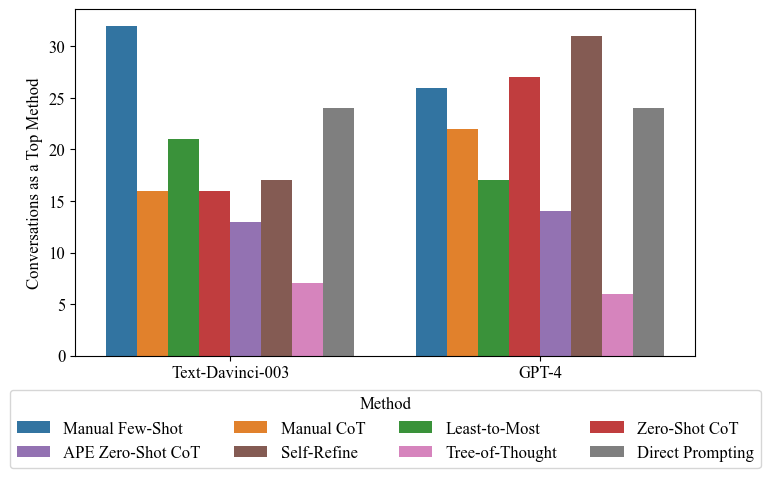

output_mmc
               Model             Method  Conversations as a Top Method
0   Text-Davinci-003    Manual Few-Shot                             32
1                      Direct Prompting                             24
2                         Least-to-Most                             21
3                           Self-Refine                             17
4                            Manual CoT                             16
5                         Zero-Shot CoT                             16
6                     APE Zero-Shot CoT                             13
7                       Tree-of-Thought                              7
8              GPT-4        Self-Refine                             31
9                         Zero-Shot CoT                             27
10                      Manual Few-Shot                             26
11                     Direct Prompting                             24
12                           Manual CoT                           

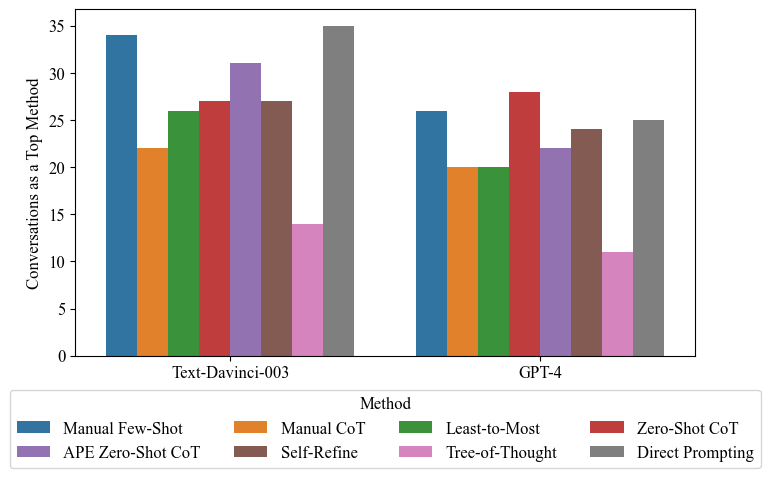

output_mmc
               Model             Method  Conversations as a Top Method
0   Text-Davinci-003   Direct Prompting                             35
1                       Manual Few-Shot                             34
2                     APE Zero-Shot CoT                             31
3                           Self-Refine                             27
4                         Zero-Shot CoT                             27
5                         Least-to-Most                             26
6                            Manual CoT                             22
7                       Tree-of-Thought                             14
8              GPT-4      Zero-Shot CoT                             28
9                       Manual Few-Shot                             26
10                     Direct Prompting                             25
11                          Self-Refine                             24
12                    APE Zero-Shot CoT                           

In [50]:
# Make preference table

# Loop over variables
for variable in vars_to_make_preference_table_for:

    # By Model and conversation_number, get values of Method that are maxes
    max_scores = cw_data.groupby(['Model', 'conversation_number'])[variable].max().reset_index()

    print('max_scores')
    print(max_scores)

    # Create df with Model, conversation_number, Method, and max_score
    preferred_method_df = pd.merge(cw_data[['Model', 'Method', 'conversation_number', variable]], max_scores, on=['Model', 'conversation_number', variable], how='inner')

    print('preferred_method_df')
    print(preferred_method_df)

    # Get counts by model, method
    model_method_counts = preferred_method_df[['Model', 'Method', 'conversation_number']].groupby(['Model', 'Method']).count()
    # Rename variable column to count
    model_method_counts = model_method_counts.rename(columns={'conversation_number': 'Conversations as a Top Method'}).sort_values(by = ['Model', 'Conversations as a Top Method'], ascending=False)

    # Flatten columns
    model_method_counts = model_method_counts.reset_index()

    # Produce plot
    plt.figure(figsize=f_size)
    sns.barplot(x='Model', y='Conversations as a Top Method', hue='Method', hue_order=hue_order_pub_date, data=model_method_counts, order=order_list)
    #sns.barplot(x='Model', y='change_in_accuracy_quality_per_change_in_conversation_length', hue='Method', data=averages_for_changes_cw)
    #plt.xlabel('')
    # plt.ylabel('Change in Creative Writing Coherence per Change in Conversation Length')
    #plt.title('Change in Creative Writing Coherence per Change in Conversation Length by Model and Method')
    # No x axis title
    plt.gca().set_xlabel('')
    plt.gca().set_ylabel('Conversations as a Top Method')#, fontsize=fontsize_cw)
    # Put legend centered below plot area
    #plt.legend(title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=4)
    # Create legend filling rows first
    handles, labels = plt.gca().get_legend_handles_labels()
    num_cols = 4
    plt.legend(flip(handles, num_cols), flip(labels, num_cols), title = 'Method', loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=num_cols)
    # Put legend to the right of the plot
    #plt.legend(title = 'Method', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    #plt.title('Human Creative Writing Coherence Preferences - Compliance Adjusted')#, pad=title_pad)
    #plt.title('Human Creative Writing Coherence Preferences - Compliance Adjusted')
    plt.savefig('../Output/cw_preference_plot_' + variable + '.png', bbox_inches='tight')
    plt.show()
    plt.close()

    # Set model to blank if it's not the first row for that model
    output_mmc = model_method_counts.copy()
    output_mmc['Model'] = output_mmc['Model'].where(output_mmc['Model'] != output_mmc['Model'].shift(), '')

    print('output_mmc')
    print(output_mmc)

    # Output to LaTeX
    # Center columns
    output_mmc.to_latex('../Output/cw_preference_table_' + variable + '.tex', index=False, column_format='c c c')

    # Keep rows that are the highest count for their model
    most_preferred_methods = model_method_counts.reset_index()
    most_preferred_methods = most_preferred_methods.sort_values(by=['Conversations as a Top Method'], ascending=False)
    most_preferred_methods = most_preferred_methods.drop_duplicates(subset=['Model'], keep='first')

    print('most_preferred_methods')
    print(most_preferred_methods)

    # Output to LaTeX
    most_preferred_methods.to_latex('../Output/cw_most_preferred_methods_' + variable + '.tex', index=False, column_format='c c c')


### Agreement Statistics and Test

In [51]:
# Create Human column as coherence_1_incoherent_10_very_coherent_compliance_adjusted
# Create Aggregated_Prediction_random_50_LP as Aggregated_Prediction_random_50_LP_compliance_adjusted
cw_data['Human'] = cw_data['coherence_1_incoherent_10_very_coherent_compliance_adjusted']
cw_data['Aggregated_Prediction_random_50_LP'] = cw_data['Aggregated_Prediction_random_50_LP_compliance_adjusted']


C:\Users\ijyli\AppData\Local\Temp\ipykernel_8012\3428409056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['Human'] = cw_data['coherence_1_incoherent_10_very_coherent_compliance_adjusted']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_8012\3428409056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cw_data['Aggregated_Prediction_random_50_LP'] = cw_data['Aggregated_Prediction_random_50_LP_compliance_adjusted']


In [52]:
human_and_agg_random_lp_50 = cw_data[['model', 'task', 'method', 'conversation_number', 'Human', 'Aggregated_Prediction_random_50_LP']]

# Human maxes
# By model, task, conversation_number, keep the row with the max Human score
human_maxes = human_and_agg_random_lp_50.groupby(['model', 'task', 'conversation_number'])['Human'].max().reset_index() 
#print(human_maxes)
# Inner join with human_and_agg_random_lp_50
human_max_rows = pd.merge(human_maxes, human_and_agg_random_lp_50, how='inner', on=['model', 'task', 'conversation_number', 'Human'])[['model', 'task', 'method', 'conversation_number', 'Human']].rename(columns = {'method': 'human_preferred_method'})
print(human_max_rows)

# Aggregated maxes
# By model, task, conversation_number, keep the row with the max Aggregated_Prediction_random_50_LP score
agg_maxes = human_and_agg_random_lp_50.groupby(['model', 'task', 'conversation_number'])['Aggregated_Prediction_random_50_LP'].max().reset_index()
#print(agg_maxes)
# Inner join with human_and_agg_random_lp_50
agg_max_rows = pd.merge(agg_maxes, human_and_agg_random_lp_50, how='inner', on=['model', 'task', 'conversation_number', 'Aggregated_Prediction_random_50_LP'])[['model', 'task', 'method', 'conversation_number', 'Aggregated_Prediction_random_50_LP']].rename(columns = {'method': 'agg_preferred_method'})
print(agg_max_rows)

# Inner join human_max_rows and agg_max_rows
human_and_agg_random_lp_50_maxes = pd.merge(human_max_rows, agg_max_rows, how='inner', on=['model', 'task', 'conversation_number'])
print(human_and_agg_random_lp_50_maxes)


    model task human_preferred_method  conversation_number  Human
0    gpt4   cw          zero_shot_cot                    1    8.0
1    gpt4   cw        manual_few_shot                    2    9.0
2    gpt4   cw            self_refine                    3    8.0
3    gpt4   cw        manual_few_shot                    3    8.0
4    gpt4   cw      ape_zero_shot_cot                    4    8.0
..    ...  ...                    ...                  ...    ...
387   td3   cw            self_refine                   96    9.0
388   td3   cw      ape_zero_shot_cot                   97    2.0
389   td3   cw          zero_shot_cot                   98    9.0
390   td3   cw       direct_prompting                   99    4.0
391   td3   cw            self_refine                  100    4.0

[392 rows x 5 columns]
    model task agg_preferred_method  conversation_number  \
0    gpt4   cw        zero_shot_cot                    1   
1    gpt4   cw      tree_of_thought                    2   
2   

In [53]:
# Note there are ties... a lot of them, nearly 2 tied items per conversation, more for agg cases

# How many unique model, task, conversation_number combinations are there?
print('unique model, task, conversation_number combinations')
unique_mtcn_combs = len(cw_data.groupby(['model', 'task', 'conversation_number']).size())
print(unique_mtcn_combs)
# Should be 2 * 100 = 200, good

# For how many groupings is there at least one row where human_preferred_method == agg_preferred_method?
print('groupings where at least one human_preferred_method == agg_preferred_method')
g_atl_one_human_eq_agg = len(human_and_agg_random_lp_50_maxes[human_and_agg_random_lp_50_maxes['human_preferred_method'] == human_and_agg_random_lp_50_maxes['agg_preferred_method']].groupby(['model', 'task', 'conversation_number']).size())
print(g_atl_one_human_eq_agg)

# Probability
print('probability of group having at least one human_preferred_method == agg_preferred_method')
p_atl_one_human_eq_agg = g_atl_one_human_eq_agg / unique_mtcn_combs
print(p_atl_one_human_eq_agg)

# Average number of rows per grouping
print('average number of combinations of methods that are the max for both groups')
print(np.mean(human_and_agg_random_lp_50_maxes[human_and_agg_random_lp_50_maxes['human_preferred_method'] == human_and_agg_random_lp_50_maxes['agg_preferred_method']].drop_duplicates().groupby(['model', 'task', 'conversation_number']).size()))


unique model, task, conversation_number combinations
200
groupings where at least one human_preferred_method == agg_preferred_method
153
probability of group having at least one human_preferred_method == agg_preferred_method
0.765
average number of combinations of methods that are the max for both groups
1.9477124183006536


In [54]:
# Save probability as a percentage for latex with stattotex
# Convert
p_atl_one_human_eq_agg_percent_str = str(round(p_atl_one_human_eq_agg * 100, 2)) + '\%'
# stattotex(number, number_name, filename):
stattotex(p_atl_one_human_eq_agg_percent_str, 'pAtlOneHumanEqAggPct', stattotex_file)


In [55]:
print(human_and_agg_random_lp_50_maxes[human_and_agg_random_lp_50_maxes['human_preferred_method'] == human_and_agg_random_lp_50_maxes['agg_preferred_method']])


     model task human_preferred_method  conversation_number  Human  \
0     gpt4   cw          zero_shot_cot                    1    8.0   
2     gpt4   cw        manual_few_shot                    2    9.0   
7     gpt4   cw      ape_zero_shot_cot                    4    8.0   
11    gpt4   cw             manual_cot                    5    9.0   
12    gpt4   cw       direct_prompting                    6    1.0   
...    ...  ...                    ...                  ...    ...   
1552   td3   cw          least_to_most                   94    3.0   
1555   td3   cw            self_refine                   96    9.0   
1556   td3   cw      ape_zero_shot_cot                   97    2.0   
1558   td3   cw       direct_prompting                   99    4.0   
1566   td3   cw            self_refine                  100    4.0   

     agg_preferred_method  Aggregated_Prediction_random_50_LP  
0           zero_shot_cot                                 7.0  
2         manual_few_shot      

### A brief (very tentative, heavy on assumptions, and possibly wrong) simulation study of the share of groupings where at least one human preferred method is equal to an aggregate preferred method

In [56]:
# We really should draw from something like the probability distribution of actual scores...
# For each method, calculate distribution of Human and Aggregated_Prediction_random_50_LP
# Then, for each model, task, conversation_number combination, draw from those distributions

method_human_distributions = []
method_lp_1_distributions = []
method_lp_2_distributions = []
for method in cw_data['method'].unique():
    # Load data for method
    method_data = cw_data[cw_data['method'] == method]
    # Get counts of each value of Human as a list
    method_human_counts = []
    for value in range(1, 11):
        method_human_counts.append(len(method_data[method_data['Human'] == value]))
    # Divide by sum to get probabilities
    method_human_probs = [x / sum(method_human_counts) for x in method_human_counts]
    # Append to method_human_distributions
    method_human_distributions.append(method_human_probs)
    # Get counts of each value of Prediction_Based_On_random_50_LP_1
    method_lp_1_counts = []
    for value in range(1, 11):
        method_lp_1_counts.append(len(method_data[method_data['Prediction_Based_On_random_50_LP_1'] == value]))
    # Divide by sum to get probabilities
    method_lp_1_probs = [x / sum(method_lp_1_counts) for x in method_lp_1_counts]
    # Append to method_human_distributions
    method_lp_1_distributions.append(method_lp_1_probs)
    # Get counts of each value of Prediction_Based_On_random_50_LP_2
    method_lp_2_counts = []
    for value in range(1, 11):
        method_lp_2_counts.append(len(method_data[method_data['Prediction_Based_On_random_50_LP_2'] == value]))
    # Divide by sum to get probabilities
    method_lp_2_probs = [x / sum(method_lp_2_counts) for x in method_lp_2_counts]
    # Append to method_human_distributions
    method_lp_2_distributions.append(method_lp_2_probs)
    
print(method_human_distributions)
print(method_lp_1_distributions)
print(method_lp_2_distributions)

# Set seed
random.seed(201)
# Set up simulations
num_sims = 1000000
# Indicators for if at least one index of max method_human_scores == index of max of method_agg_scores
at_least_one_idx_max_human_agg_equal_empirical = []
# number of shared maxes
num_shared_maxes = []
# For each simulation - roughly equalivalent to a model, task, conversation_number combination
for _ in range(num_sims):
    # For each method, draw human score as number from 1 to 10, uniform
    method_human_scores = [random.choices(range(1, 11), weights = method_human_distributions[i])[0] for i in range(8)]
    # Draw lp 1 and lp 2 scores
    lp_1_scores = [random.choices(range(1, 11), weights = method_lp_1_distributions[i])[0] for i in range(8)]
    lp_2_scores = [random.choices(range(1, 11), weights = method_lp_2_distributions[i])[0] for i in range(8)]
    # Aggregate scores
    method_agg_scores = [sum(x) / 2 for x in zip(lp_1_scores, lp_2_scores)]
    # Get indices of max human score
    indices_max_human_score = [i for i, x in enumerate(method_human_scores) if x == max(method_human_scores)]
    # Get indices of max agg score
    indices_max_agg_score = [i for i, x in enumerate(method_agg_scores) if x == max(method_agg_scores)]
    # Num shared maxes
    num_shared_maxes.append(len(set(indices_max_human_score).intersection(indices_max_agg_score)))
    # Append indicator for sharing at least one index
    at_least_one_idx_max_human_agg_equal_empirical.append(len(set(indices_max_human_score).intersection(indices_max_agg_score)) > 0)


[[0.53, 0.045, 0.045, 0.07, 0.06, 0.07, 0.025, 0.085, 0.05, 0.02], [0.56, 0.075, 0.035, 0.045, 0.03, 0.035, 0.07, 0.095, 0.04, 0.015], [0.565, 0.045, 0.075, 0.045, 0.045, 0.055, 0.055, 0.06, 0.05, 0.005], [0.625, 0.03, 0.095, 0.045, 0.045, 0.04, 0.04, 0.035, 0.025, 0.02], [0.525, 0.05, 0.065, 0.045, 0.04, 0.045, 0.06, 0.095, 0.06, 0.015], [0.67, 0.035, 0.025, 0.035, 0.03, 0.02, 0.075, 0.085, 0.02, 0.005], [0.87, 0.005, 0.01, 0.035, 0.0, 0.02, 0.02, 0.025, 0.015, 0.0], [0.665, 0.03, 0.025, 0.03, 0.05, 0.045, 0.05, 0.055, 0.045, 0.005]]
[[0.14, 0.11, 0.09, 0.04, 0.18, 0.05, 0.07, 0.22, 0.1, 0.0], [0.15, 0.18, 0.15, 0.03, 0.06, 0.03, 0.09, 0.3, 0.01, 0.0], [0.09, 0.23, 0.13, 0.04, 0.14, 0.01, 0.07, 0.28, 0.01, 0.0], [0.05, 0.11, 0.11, 0.13, 0.21, 0.08, 0.18, 0.12, 0.01, 0.0], [0.07, 0.14, 0.06, 0.05, 0.12, 0.04, 0.09, 0.39, 0.04, 0.0], [0.08, 0.11, 0.14, 0.04, 0.17, 0.05, 0.17, 0.21, 0.03, 0.0], [0.12, 0.2, 0.12, 0.04, 0.13, 0.06, 0.08, 0.22, 0.03, 0.0], [0.15, 0.15, 0.07, 0.05, 0.09, 0.0

In [57]:
# Simulation probability of agreement
print('simulation probability of agreement')
sim_prob_agreement_complex = np.mean(at_least_one_idx_max_human_agg_equal_empirical)
print(sim_prob_agreement_complex)
print('num shared maxes')
print(np.mean(num_shared_maxes))


simulation probability of agreement
0.218352
num shared maxes
0.226692


In [58]:
# Save probability as a percentage for latex with stattotex
# Convert
sim_prob_agreement_complex_str = str(round(sim_prob_agreement_complex * 100, 2)) + '\%'
# stattotex(number, number_name, filename):
stattotex(sim_prob_agreement_complex_str, 'simProbAgmtCmplStr', stattotex_file)
